# Applying labs to our dataset
## Lab 1

In [2]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

Get the data: 

In [3]:
def load_data():
    path = 'data/StudentsPerformance.csv'
    return pd.read_csv(path)

data = load_data()
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Exploratory Data Analysis

In [4]:
data.describe()  # analyses numeric columns

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


array([[<AxesSubplot:title={'center':'math score'}>,
        <AxesSubplot:title={'center':'reading score'}>],
       [<AxesSubplot:title={'center':'writing score'}>, <AxesSubplot:>]],
      dtype=object)

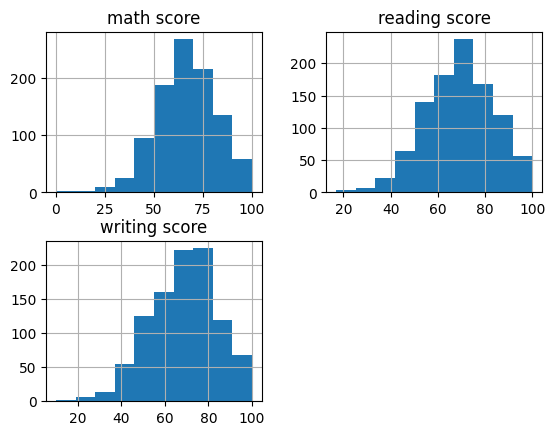

In [5]:
data.hist()

### Correlation between Scores
An overview of the correlation between
- reading and writing
- maths and writing
- maths and reading

<AxesSubplot:xlabel='math score', ylabel='reading score'>

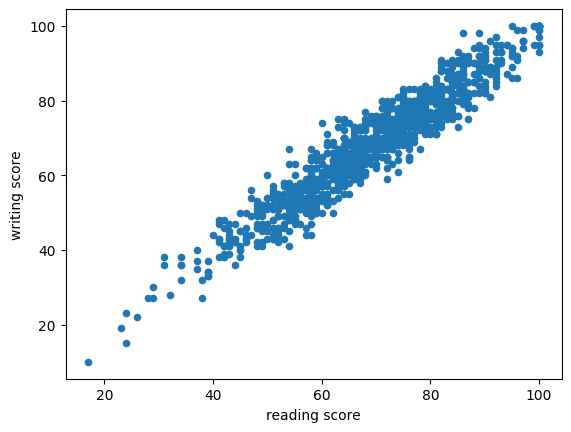

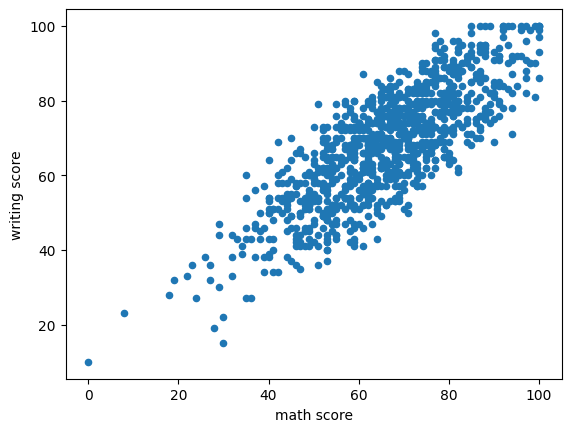

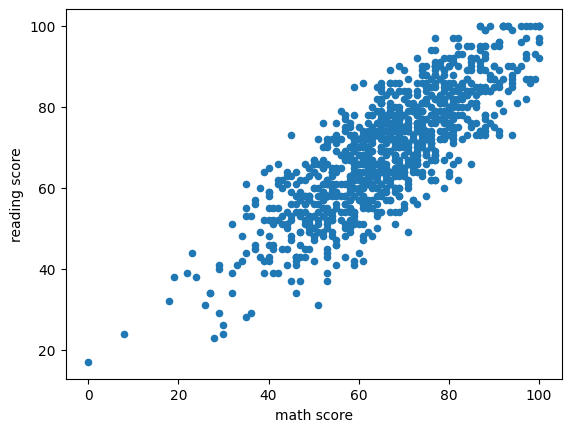

In [6]:
data.plot(x='reading score', y='writing score', kind='scatter')
data.plot(x='math score', y='writing score', kind='scatter')
data.plot(x='math score', y='reading score', kind='scatter')

## Lab 2
Getting started with sci-kit learn :). The first part of this lab is not applicable to our dataset. However, in machine-learning/p2.ipynb, I went through it all with the MNIST dataset. 

### Pre-processing of the data 
First, turn all the categorical data into numerical data. Then normalize it and sort it into train and test data. 

In [7]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Turning categorical data into numerical data. We need ordinal encoding for all categorical values with a natural ordering and one-hot encoding for all data without any natural ordering.  
1. **Ordinal encoding**: Just replace the category by an integer.  
2. **One-hot encoding**: To avoid creating an order between data values that don't have a natural order, add another binary column for each unique value in the column. 

In [8]:
# Keep hold of the original dataframe. 
df = data.copy()

# In our data, the ordinal columns would be: 'parental level of education'. 
from sklearn.preprocessing import OrdinalEncoder

ordinal_enc = OrdinalEncoder()  # TODO: 
df['parental level of education'] = ordinal_enc.fit_transform(df[['parental level of education']])

df.head()  # Data with numerical values for 'parental level of education'.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,1.0,standard,none,72,72,74
1,female,group C,4.0,standard,completed,69,90,88
2,female,group B,3.0,standard,none,90,95,93
3,male,group A,0.0,free/reduced,none,47,57,44
4,male,group C,4.0,standard,none,76,78,75


In [9]:
# Now our leftover categorical values are all without any natural ordering. The following columns must be transformed: gender, ethnicity, lunch, test preparation course.
from sklearn.preprocessing import OneHotEncoder

onehot_enc = OneHotEncoder(drop='if_binary', sparse=False)

# The following attributes are all binary attributes and since drop = 'if_binary', the encoder will drop the second column as it is redundant information.
binary_onehot = data[['gender', 'lunch', 'test preparation course']]
df[['gender', 'lunch', 'test preparation course']] = onehot_enc.fit_transform(binary_onehot)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0.0,group B,1.0,1.0,1.0,72,72,74
1,0.0,group C,4.0,1.0,0.0,69,90,88
2,0.0,group B,3.0,1.0,1.0,90,95,93
3,1.0,group A,0.0,0.0,1.0,47,57,44
4,1.0,group C,4.0,1.0,1.0,76,78,75


In [10]:
# Now the only leftover categorical data is 'race/ethnicity'. Let's convert this as well. 
df[['ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E']] = onehot_enc.fit_transform(df[['race/ethnicity']])

df = df.drop(axis=1, columns=['race/ethnicity'])  # Drop the column containing categorical data.
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


Now split the data into X (input) and y (target/outcome). In this case, I'm using the math score as y. 

In [11]:
X = df[['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicity A', 'ethnicity B', 'ethnicity C', 'ethnicity D', 'ethnicity E', 'reading score', 'writing score']]
y = df[['math score']]

X.head()  # Always good to check :) 

,gender,parental level of education,lunch,test preparation course,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E,reading score,writing score
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,72,74
1,0.0,4.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,90,88
2,0.0,3.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,95,93
3,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,57,44
4,1.0,4.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,78,75


In [12]:
y.head()  # Also check y.

,math score
0,72
1,69
2,90
3,47
4,76


After having X and y, we can scale the data and then split the data into a training and a test set. 

In [13]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

def scale_min_max(X, y): 
    scaler = MinMaxScaler()  # The skaler for the data.
    X_scaled = scaler.fit_transform(X)
    y_scaled = scaler.fit_transform(y)
    return X_scaled, y_scaled

In [14]:
# Split into train and test set. 
from sklearn.model_selection import train_test_split

X_scaled, y_scaled = scale_min_max(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)

## Lab 3
1. Analyse most correlating features/attributes of the data set, generally and per class. 
2. Form 3 data sets, that contain progressively fewer features/attributes. 

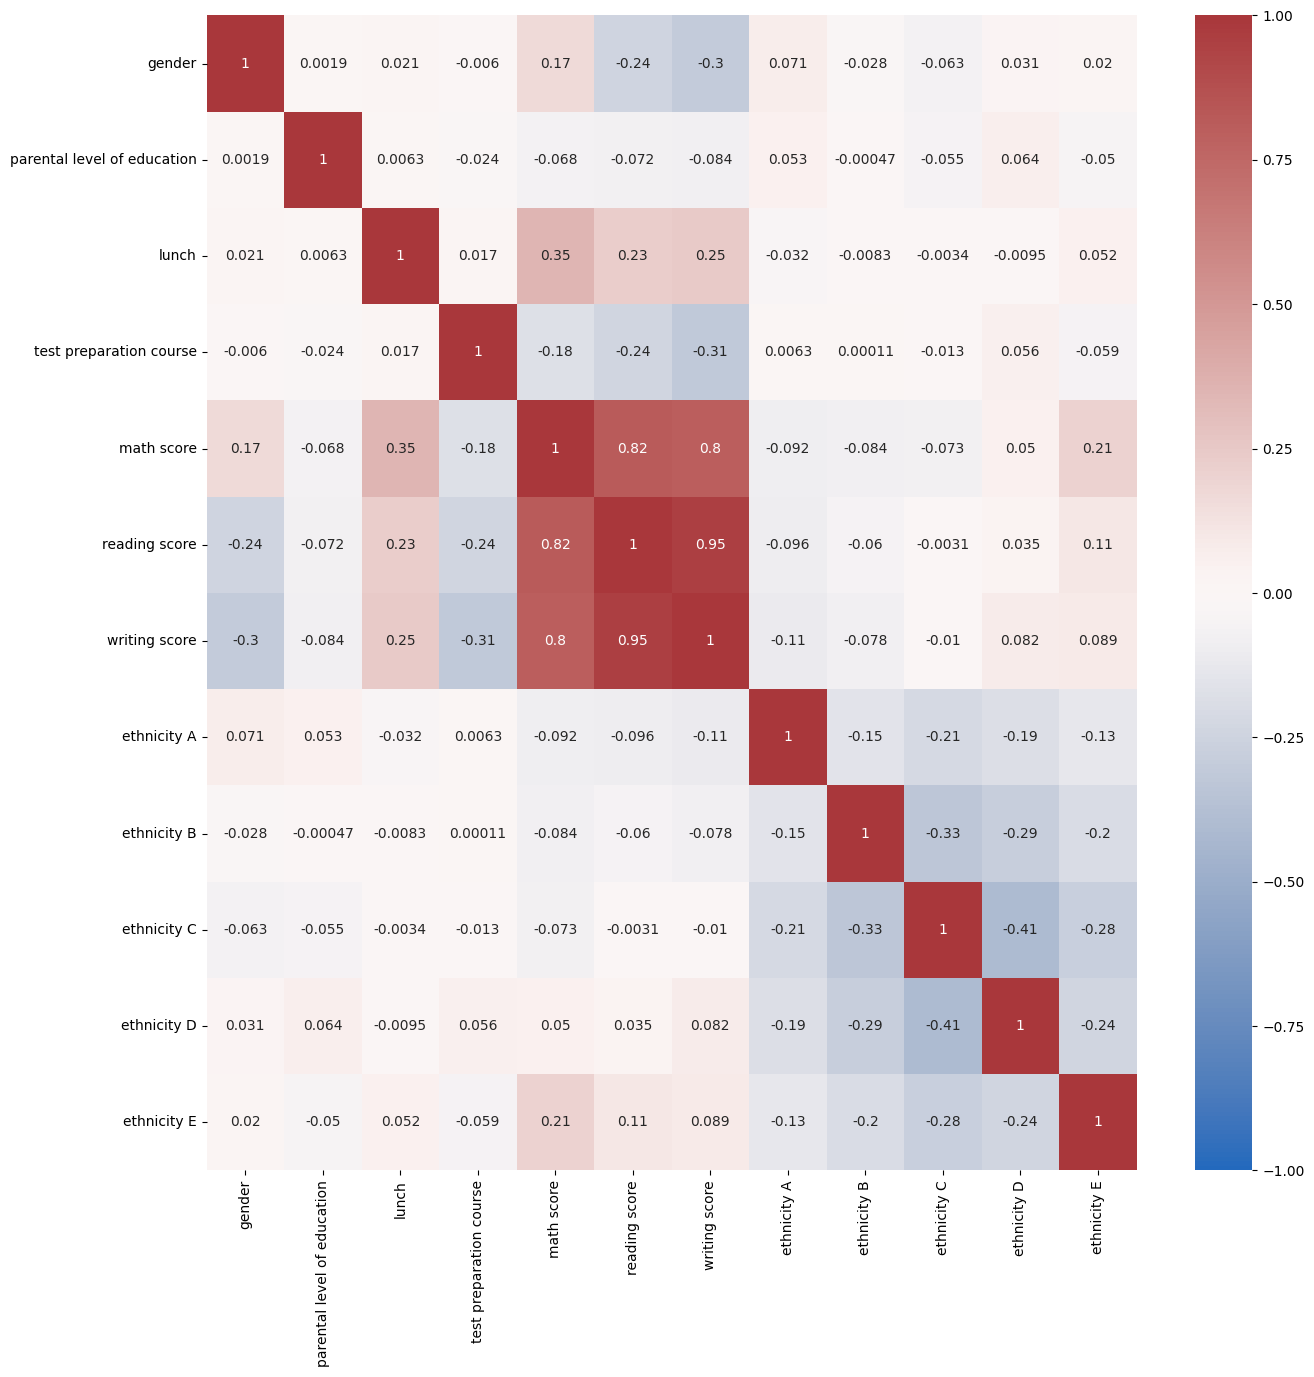

In [15]:
import seaborn as sns 

corr_matrix = df.corr(method='pearson')

fig, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr_matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag', ax=ax)
plt.show()

In [16]:
# Correlation of all columns to the math score
corr_math = corr_matrix.iloc[4].map(lambda x: abs(x))
corr_math.sort_values(ascending=False)

math score                     1.000000
reading score                  0.817580
writing score                  0.802642
lunch                          0.350877
ethnicity E                    0.205855
test preparation course        0.177702
gender                         0.167982
ethnicity A                    0.091977
ethnicity B                    0.084250
ethnicity C                    0.073387
parental level of education    0.068279
ethnicity D                    0.050071
Name: math score, dtype: float64

In [17]:
corr_reading = corr_matrix.iloc[5].map(lambda x: abs(x))
corr_reading.sort_values(ascending=False)

reading score                  1.000000
writing score                  0.954598
math score                     0.817580
gender                         0.244313
test preparation course        0.241780
lunch                          0.229560
ethnicity E                    0.106712
ethnicity A                    0.096274
parental level of education    0.072444
ethnicity B                    0.060283
ethnicity D                    0.035177
ethnicity C                    0.003074
Name: reading score, dtype: float64

In [18]:
corr_gender = corr_matrix.iloc[0].map(lambda x: abs(x))  # Correlation for gender. 
corr_gender.sort_values(ascending=False)

gender                         1.000000
writing score                  0.301225
reading score                  0.244313
math score                     0.167982
ethnicity A                    0.071001
ethnicity C                    0.063368
ethnicity D                    0.030566
ethnicity B                    0.028466
lunch                          0.021372
ethnicity E                    0.020302
test preparation course        0.006028
parental level of education    0.001913
Name: gender, dtype: float64

In [19]:
corr_ethnicity_a = corr_matrix.iloc[7].map(lambda x: abs(x))  # Correlation for lunch.
corr_ethnicity_a.sort_values(ascending=False)

ethnicity A                    1.000000
ethnicity C                    0.213923
ethnicity D                    0.186234
ethnicity B                    0.151381
ethnicity E                    0.126110
writing score                  0.110714
reading score                  0.096274
math score                     0.091977
gender                         0.071001
parental level of education    0.053288
lunch                          0.032329
test preparation course        0.006315
Name: ethnicity A, dtype: float64

Split into three datasets containing a different amount of top-correlating features (1, 2, 3) for each class (in total: 3, 6, 9 features). The three classes I've chosen for practice here are `math score`, `gender` and `ethnicity A`. This doesn't necessarily make sense in the real world.

In [20]:
# Top correlating for
## Math score:  writing score,  math score,     gender
## Gender:      writing score,  reading score,  math score
## Ethnicity A: ethnicity C,    ethnicity D,    ethnicity B

data_two_features = df[['writing score', 'ethnicity C']]
data_five_features = df[
    ['writing score', 'math score', 'reading score', 'ethnicity C', 'ethnicity D']
]
data_seven_features = df[[
    'writing score', 
    'math score', 
    'reading score', 
    'ethnicity C', 
    'ethnicity D', 
    'gender', 
    'ethnicity B'
]]
data_seven_features.head()

,writing score,math score,reading score,ethnicity C,ethnicity D,gender,ethnicity B
0,74,72,72,0.0,0.0,0.0,1.0
1,88,69,90,1.0,0.0,0.0,0.0
2,93,90,95,0.0,0.0,0.0,1.0
3,44,47,57,0.0,0.0,1.0,0.0
4,75,76,78,1.0,0.0,1.0,0.0


Task: Run a classifier of your choice on the original and smaller data sets, and record their accuracy on these datasets.  
First, the **Original Dataset**:

In [21]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [22]:
# Check the accuracy of the LinearRegression model.
accuracy_data = pd.DataFrame(lr.predict(X_train))
accuracy_data['target'] = y_train

lr.score(X_test, y_test)

0.8723631807426231

Now the **Smaller Datasets**:

In [23]:
X_two_train, X_two_test, y_two_train, y_two_test = train_test_split(
    data_two_features, df[['math score']]
)
X_five_train, X_five_test, y_five_train, y_five_test = train_test_split(
    data_five_features, df[['gender']]
)
X_seven_train, X_seven_test, y_seven_train, y_seven_test = train_test_split(
    data_seven_features, df[['ethnicity A']]
)

In [24]:
# 2 features. 
lr_two = LinearRegression() 
lr_two.fit(X_two_train, y_two_train)

# lr_two.score(X_two_test, y_two_test)

acc_two = pd.DataFrame(
    {'Actual': y_two_test.squeeze(), 'Predicted:': lr_two.predict(X_two_test).squeeze()}
)
lr_two.score(X_two_test, y_two_test)

0.6450408919159687

In [25]:
# 5 features predicting the gender. 
from sklearn.linear_model import SGDClassifier
clf_five = SGDClassifier(max_iter=1000, random_state=42) 
clf_five.fit(X_five_train, y_five_train)

# lr_two.score(X_two_test, y_two_test)

acc_five = pd.DataFrame(
    {'Actual': y_five_test.squeeze(), 'Predicted:': clf_five.predict(X_five_test).squeeze()}
)

from sklearn.model_selection import cross_val_score
cross_val_score(clf_five, X_five_train, y_five_train, cv=3, scoring='accuracy')

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected.

array([0.696, 0.856, 0.804])

## Lab 4
Do classifier testing and evaluation. Run any classifier model of your choice on your data set and record the major metrics: 
- accuracy, 
- TP rate (true-positive)
- FP rate (false-positive)
- precision
- recall
- F-measure
- ROC area
Then plot your confusion matrix and make comparisons between different evaluation metrics. Which ones seem more suitable for your data set?  

In [26]:
# 'lr' is my Linear Regression model for all data trying to predict the math score. 
# Here, I should work with trying to predict the gender, as this is classification and predicting the math score isn't. 
df.head()

,gender,parental level of education,lunch,test preparation course,math score,reading score,writing score,ethnicity A,ethnicity B,ethnicity C,ethnicity D,ethnicity E
0,0.0,1.0,1.0,1.0,72,72,74,0.0,1.0,0.0,0.0,0.0
1,0.0,4.0,1.0,0.0,69,90,88,0.0,0.0,1.0,0.0,0.0
2,0.0,3.0,1.0,1.0,90,95,93,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,47,57,44,1.0,0.0,0.0,0.0,0.0
4,1.0,4.0,1.0,1.0,76,78,75,0.0,0.0,1.0,0.0,0.0


In [27]:
X_scaled, y_scaled = scale_min_max(df.drop('gender', axis=1), df[['gender']])
X_scaled.shape

(1000, 11)

Now let's run the Stochastic Gradient Descent Classifier on it. 

In [28]:
X_train

array([[1.        , 0.2       , 0.        , ..., 0.        , 0.46987952,
        0.52222222],
       [0.        , 0.8       , 1.        , ..., 1.        , 0.90361446,
        0.96666667],
       [1.        , 1.        , 1.        , ..., 0.        , 0.75903614,
        0.72222222],
       ...,
       [0.        , 1.        , 1.        , ..., 0.        , 0.4939759 ,
        0.54444444],
       [0.        , 0.8       , 1.        , ..., 0.        , 0.75903614,
        0.8       ],
       [0.        , 0.8       , 1.        , ..., 1.        , 0.63855422,
        0.73333333]])

In [29]:
from sklearn.linear_model import SGDClassifier

gender_sgd_clf = SGDClassifier(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled)
gender_sgd_clf.fit(X_train, y_train)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(random_state=42)

In [30]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

y_true = y_test
y_pred = gender_sgd_clf.predict(X_test)

Get the accuracy, TP rate, FP rate, precision, recall, F measure and the ROC area. 

In [31]:
def getMetrics(y_true, y_pred):
    # Keeping track of all the metrics. 
    metrics = {}

    # For the accuracy. 
    from sklearn.metrics import accuracy_score
    metrics['accuracy'] = accuracy_score(y_true, y_pred)
    metrics['accuracy']
    
    # Confusion Matrix. 
    from sklearn.metrics import confusion_matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    
    # True Positive, False Positive, True Negative, False Negative
    metrics['TP'] = con_matrix[0][0]
    metrics['FP'] = con_matrix[0][1]
    metrics['TN'] = con_matrix[1][1]
    metrics['FN'] = con_matrix[1][0]
    
    # Sensitivity & Specificity
    metrics['sensitivity'] = metrics['TP'] / (metrics['TP'] + metrics['FN'])
    metrics['specificity'] = metrics['TN'] / (metrics['TN'] + metrics['FP'])

    # For recall & precision. 
    from sklearn.metrics import precision_score, recall_score

    metrics['precision'] = precision_score(y_true, y_pred)
    metrics['recall'] = recall_score(y_true, y_pred)

    # F-measure. 
    from sklearn.metrics import f1_score

    metrics['f1-score'] = f1_score(y_true, y_pred)

    # ROC area. 
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve

    metrics['roc-area'] = roc_auc_score(y_true, y_pred)

    import matplotlib.pyplot as plt
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    #create ROC curve
    plt.plot(fpr, tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    print(pd.DataFrame([metrics]))
    
    return metrics

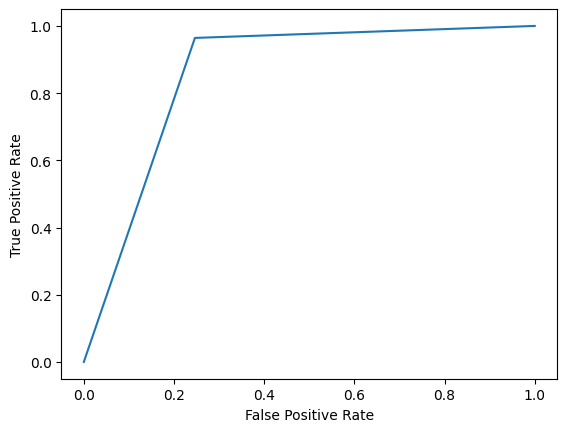

   accuracy   TP  FP   TN  FN  sensitivity  specificity  precision    recall  \
0     0.848  104  34  108   4     0.962963     0.760563   0.760563  0.964286   

   f1-score  roc-area  
0  0.850394  0.858954  


In [32]:
gender_metrics = getMetrics(y_true, y_pred)

In [33]:
precision_recall_fscore_support(y_true, y_pred, average='macro')
# precision_recall_fscore_support(y_true, y_pred, average='micro')
# precision_recall_fscore_support(y_true, y_pred, average='weighted')  # The support is the number of occurrences of each class in y_true.

(0.8617631716223265, 0.8589544513457557, 0.8479610780359772, None)

<AxesSubplot:>

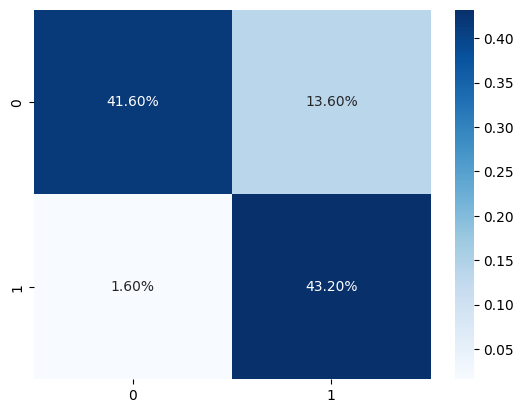

In [34]:
from sklearn.metrics import confusion_matrix

gender_confusion_matrix = confusion_matrix(y_true, y_pred)

# For plotting the matrix.
sns.heatmap(gender_confusion_matrix / np.sum(gender_confusion_matrix), annot=True, fmt='.2%', cmap='Blues')

## Lab 5
1. Read the Scikit-Learn library documentation that covers Bayes [nets](https://scikit-learn.org/stable/modules/naive_bayes.html#).
2. Run the *Multinomial Naive Bayes* on your data in your portfolio.

#### Naive Bayes (Scikit Learn)
Different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of $P(x_i|y)$. Despite their over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations (document classification & spam filtering). They require a small amount of training data to estimate the necessary parameters. They can be extremely fast. 

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


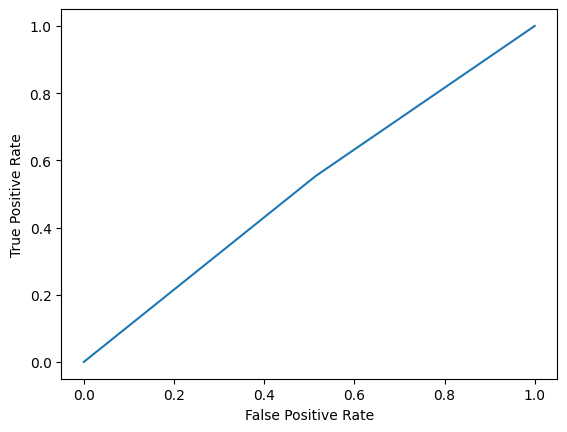

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.516  67  71  62  50      0.57265     0.466165   0.466165  0.553571   

   f1-score  roc-area  
0  0.506122  0.519539  


In [35]:
from sklearn.naive_bayes import MultinomialNB

# Create, fit, and predict a Multinomial model using the data set
multi_nom = MultinomialNB(alpha=1.0, fit_prior=False)
multi_nom.fit(X_train, y_train)
multi_nom_y_pred = multi_nom.predict(X_test)

# Get relevant metrics
multi_nom_metrics = getMetrics(y_test, multi_nom_y_pred)

#### Gaussian Naive Bayes
The likelihood of the features is assumed to be Gaussian: $P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$

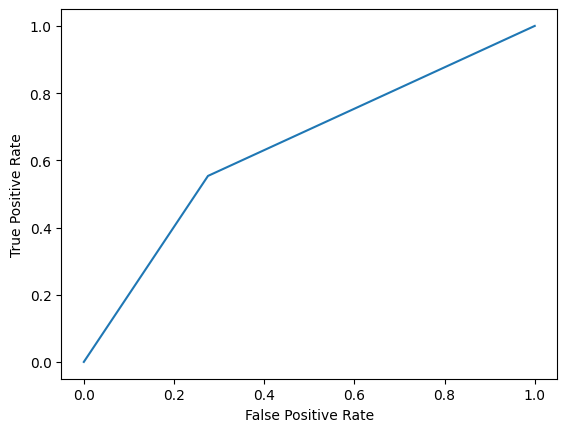

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.648  100  38  62  50     0.666667         0.62       0.62  0.553571   

   f1-score  roc-area  
0  0.584906  0.639105  


In [36]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
gnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Complement Naive Bayes
CNB is an adaptation of the standard multinomial naive Bayes (MNB) algorithm that is particularaly suited for imbalanced datsets. CNB uses statistics from the complement of each class to compute the model's weights. 

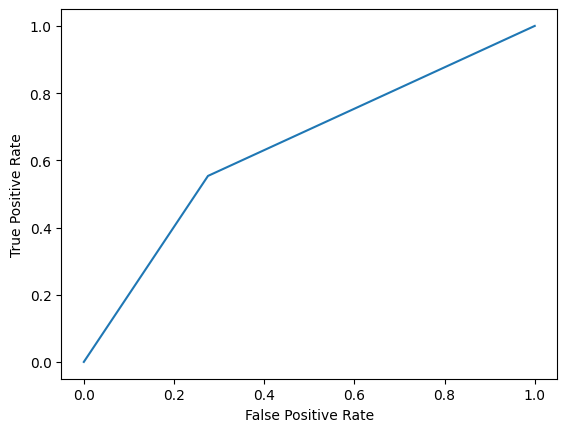

   accuracy   TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.648  100  38  62  50     0.666667         0.62       0.62  0.553571   

   f1-score  roc-area  
0  0.584906  0.639105  


In [37]:
from sklearn.naive_bayes import ComplementNB

cnb = GaussianNB()
cnb_y_pred = gnb.fit(X_train, y_train.ravel()).predict(X_test)
cnb_metrics = getMetrics(y_true, gnb_y_pred)

#### Bernoulli Naive Bayes
This implements the naive Bayes training and classification algorithms for data that is distributed according to multivariate Bernoulli distributions -> there may be multiple freatures but each one is assumed to be a binary-valued variable. Therefore this class requires samples to be represented as binaryvalued feature vectors. 

In [38]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,0.0,1.0,0.78,0.879518,0.922222,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.69,0.722892,0.655556,0.0,0.0,1.0,0.0,0.0
2,0.8,1.0,1.0,0.84,0.843373,0.788889,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.90,0.843373,0.833333,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.76,0.759036,0.700000,0.0,0.0,1.0,0.0,0.0


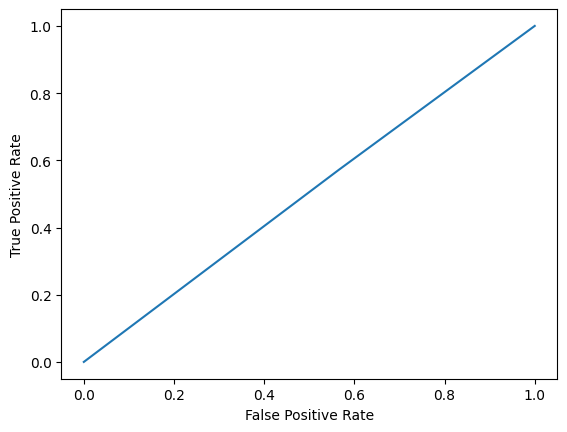

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.496  60  78  64  48     0.555556     0.450704   0.450704  0.571429   

   f1-score  roc-area  
0  0.503937  0.503106  


In [39]:
# Get only binary data ['gender', 'parental level of education', 'lunch', 'test preparation course', 'ethnicities']
# X_binary = X.drop(['reading score', 'writing score'], axis=1)

# X_binary_scaled, y_binary_scaled = scale_min_max(X, y)
# X_binary_train, X_binary_test, y_binary_train, y_binary_test = train_test_split(X_scaled, y_scaled)

from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb_y_pred = bnb.fit(X_train, y_train.ravel()).predict(X_test)
bnb_metrics = getMetrics(y_true, bnb_y_pred)

In [40]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.2,0.0,1.0,0.78,0.879518,0.922222,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.69,0.722892,0.655556,0.0,0.0,1.0,0.0,0.0
2,0.8,1.0,1.0,0.84,0.843373,0.788889,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.90,0.843373,0.833333,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.76,0.759036,0.700000,0.0,0.0,1.0,0.0,0.0


#### Categorical Naive Bayes
Implements the categorical naive Bayes algorithm for categorically distributed data. It assumes that each feature has its own categorical distribution. For each feature i in training set X, CNB estimates a categorical distribution for each feature i of X condititioned on the class y.

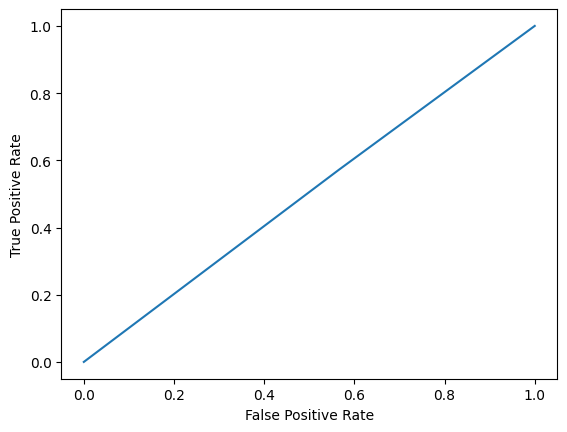

   accuracy  TP  FP  TN  FN  sensitivity  specificity  precision    recall  \
0     0.496  60  78  64  48     0.555556     0.450704   0.450704  0.571429   

   f1-score  roc-area  
0  0.503937  0.503106  


In [41]:
from sklearn.naive_bayes import CategoricalNB
catnb = CategoricalNB()
catnb_y_pred = catnb.fit(X_train, y_train.ravel()).predict(X_test)
catnb_metrics = getMetrics(y_true, bnb_y_pred)

In [42]:
# DataFrame containing metrics from different models:
## Stochastic Gradient Descent Classifier
## Multinomial Naive Bayes
## Gaussian Naive Bayes
## Complement Naive Bayes
## Bernoulli Bayes
## Categorical Bayes
metrics_comparison = pd.DataFrame(
    [gender_metrics, multi_nom_metrics, gnb_metrics, cnb_metrics, bnb_metrics, catnb_metrics],
)
metrics_comparison

,accuracy,TP,FP,TN,FN,sensitivity,specificity,precision,recall,f1-score,roc-area
0,0.848,104,34,108,4,0.962963,0.760563,0.760563,0.964286,0.850394,0.858954
1,0.516,67,71,62,50,0.572650,0.466165,0.466165,0.553571,0.506122,0.519539
2,0.648,100,38,62,50,0.666667,0.620000,0.620000,0.553571,0.584906,0.639105
3,0.648,100,38,62,50,0.666667,0.620000,0.620000,0.553571,0.584906,0.639105
4,0.496,60,78,64,48,0.555556,0.450704,0.450704,0.571429,0.503937,0.503106
5,0.496,60,78,64,48,0.555556,0.450704,0.450704,0.571429,0.503937,0.503106


#### Complex Bayesian Networks

In [43]:
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete.CPD import TabularCPD

student = BayesianNetwork([('diff', 'grades'), ('intel', 'grades')])

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Lab 5
Clustering. Unsupervised Learning. 

In [44]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

random_state = 42

In [45]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

In [46]:
# The columns of X_train: 
# gender
# parental level of education
# lunch
# test preparation course
# ethnicity A
# ethnicity B
# ethnicity C
# ethnicity D
# ethnicity E
# reading score
# writing score

# Just keep the reading and writing score for the kmeans algorithm
X_k_means = X[['reading score', 'writing score']].to_numpy()
X_train_reading_writing, X_test_reading_writing = train_test_split(X_k_means)

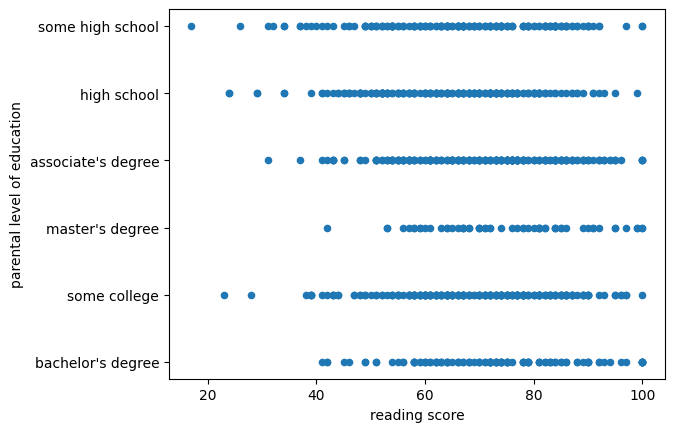

In [47]:
data.plot(x='reading score', y='parental level of education', kind='scatter')

X_k_means = X[['reading score', 'parental level of education']].to_numpy()
X_train_reading_education, X_test_reading_education = train_test_split(X_k_means)

Let's train a K-Means clusterer on our dataset. It will try to find each cluster's centeroid and assign each instance to the closest centeroid's class.  
`fit_predict` Computes cluster centeroids and predicts cluster index for each sample  
`kmeans.fit_predict`: Check this out. 

In [48]:
from sklearn.cluster import KMeans

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train_reading_writing)

In [49]:
kmeans.cluster_centers_[0]

array([66.2985782 , 65.62085308])

In [50]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

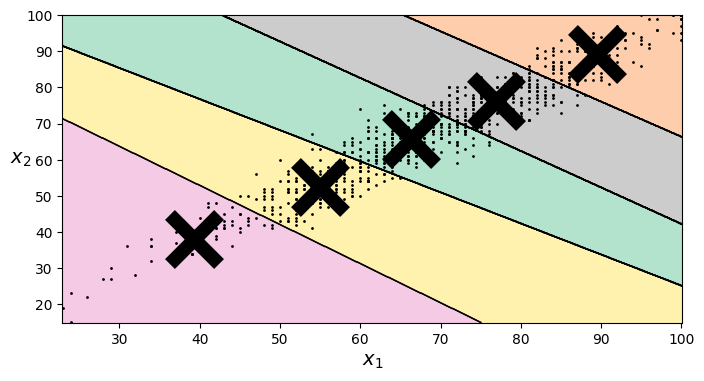

In [51]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train_reading_writing)
plt.show()

In [52]:
kmeans_iter1 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=1, random_state=1)
kmeans_iter2 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=2, random_state=1)
kmeans_iter3 = KMeans(n_clusters=k, init="random", n_init=1,
                     algorithm="full", max_iter=3, random_state=1)
kmeans_iter1.fit(X_train_reading_writing)
kmeans_iter2.fit(X_train_reading_writing)
kmeans_iter3.fit(X_train_reading_writing)

c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(
c:\Users\Laura\anaconda3\envs\F21DL\lib\site-packages\sklearn\cluster\_kmeans.py:1318: FutureWarning: algorithm='full' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=1)

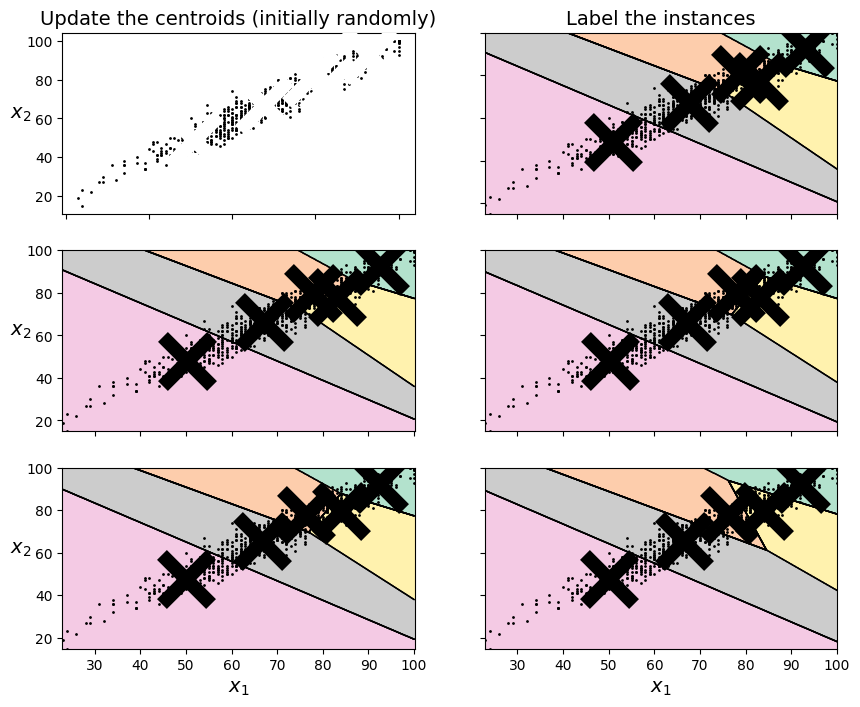

In [53]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X_train_reading_writing)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14, rotation=0)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X_train_reading_writing, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X_train_reading_writing, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X_train_reading_writing, show_ylabels=False)

plt.show()

#### Clustering for reading - parental level of education

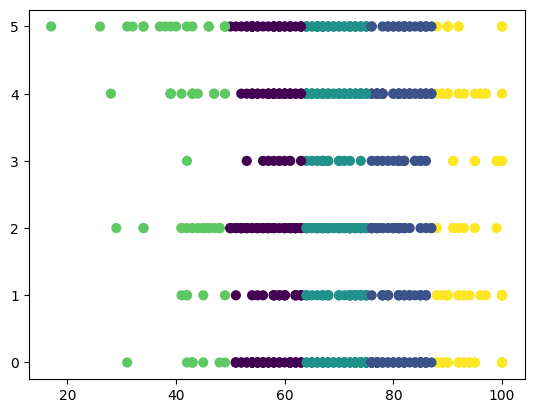

In [54]:
kmeans = KMeans(n_clusters=5, random_state=random_state)
labels = kmeans.fit_predict(X_train_reading_education)

plt.scatter(X_train_reading_education[:, 0], X_train_reading_education[:, 1], c=labels, s=40, cmap='viridis')

#### Inertia (dt. Trägheit, Untätigkeit, Schwerfälligkeit)
To select the best model, we will need a way to evaluate a K-Mean model's performance. Unfortunately, clustering is an unsupervised task, so we do not have the targets. But at least we can measure the distance between each instacne and its centroid. This is the idea behind the inertia metric. 

In [55]:
kmeans.inertia_

# This is how you calculate inertia
X_dist = kmeans.transform(X_train_reading_writing)
np.sum(X_dist[np.arange(len(X_dist)), kmeans.labels_]**2)

3713594.1694875695

#### Finding the optimal number of clusters

In [56]:
def plot_clusterer_comparison(clusterer1, clusterer2, X, title1=None, title2=None):
    clusterer1.fit(X)
    clusterer2.fit(X)

    plt.figure(figsize=(10, 3.2))

    plt.subplot(121)
    plot_decision_boundaries(clusterer1, X)
    if title1:
        plt.title(title1, fontsize=14)

    plt.subplot(122)
    plot_decision_boundaries(clusterer2, X, show_ylabels=False)
    if title2:
        plt.title(title2, fontsize=14)

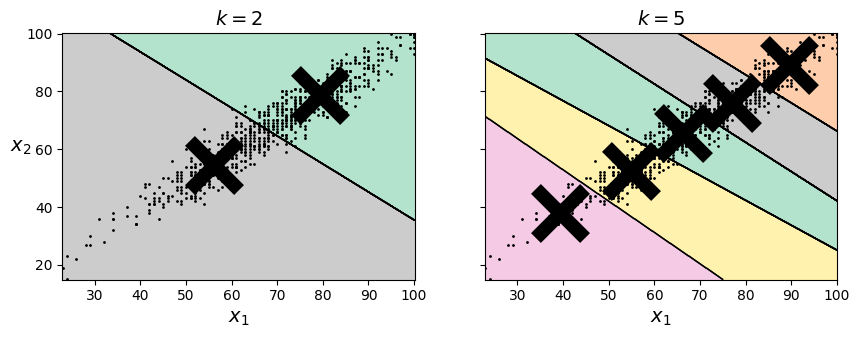

In [57]:
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
kmeans_k5 = KMeans(n_clusters=5, random_state=42)

plot_clusterer_comparison(kmeans_k2, kmeans_k5, X_train_reading_writing, "$k=2$", "$k=5$")
plt.show()

In [58]:
kmeans_k2.inertia_

120857.41788620237

In [59]:
kmeans_k5.inertia_

32077.834663237325

### Gaussian Mixture Model
To learn Gaussian Mixture Models (diagonal, sperical, tied and full covariance matrices supported). 

In [60]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=k, random_state=random_state).fit(X_train_reading_writing)
gm.means_

array([[88.97419703, 89.54232544],
       [56.66406778, 54.36100281],
       [44.69795729, 43.70280823],
       [79.21244455, 77.9798367 ],
       [68.75072707, 67.86178059]])

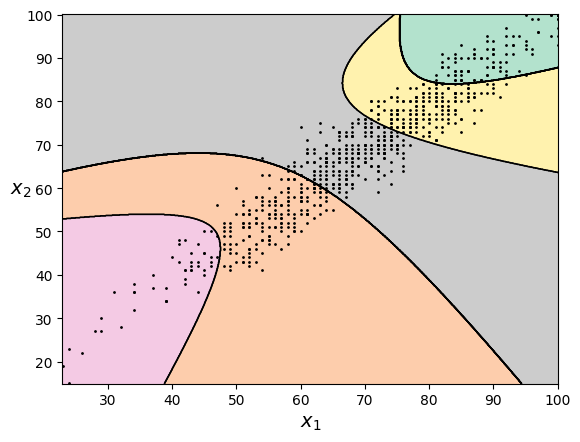

In [61]:
plot_decision_boundaries(gm, X_train_reading_writing, show_centroids=False)

### Agglomerative Clustering
Recursively merges pairs of clusters of sample data. The algorithm starts by treating each object as a singleton cluster. Next, pairs of clusters are successively merged until all clusters have been merged into one big cluster containing all objects.

In [62]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(distance_threshold=0, linkage='average', n_clusters=None)
ac = ac.fit(X_train_reading_writing)

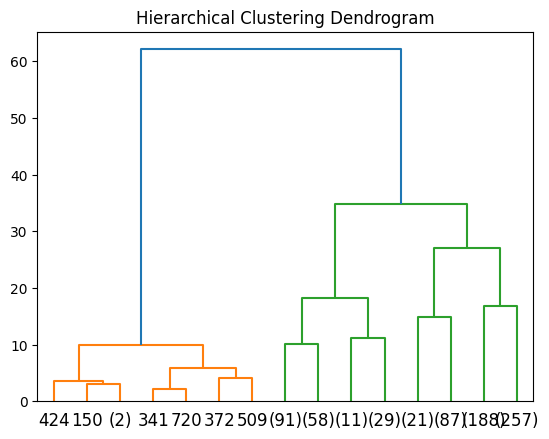

In [63]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(ac, truncate_mode='level', p=3)

### Affinity Propagation
creates clusters by sending messages between paris of samples until convergence. A dataset is then described using a small number of exemplars, which are identified as those most representative of other samples. 

In [64]:
from sklearn.cluster import AffinityPropagation

ap = AffinityPropagation(random_state=42).fit(X_train_reading_writing)
ap_cluster_centers_indices = ap.cluster_centers_indices_
ap_labels = ap.labels_
ap_n_clusters_ = len(ap_cluster_centers_indices)

### Elbow method
Applies K-Means with a different number of clusters while recording the sum of squared errors. 

In [65]:
sse = []
for k in range(1, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train_reading_writing)
    sse.append(kmeans.inertia_)
    
# Create a dataframe containing the number of clusters and the associated sums of squared error
cluster_df = pd.DataFrame({'Cluster':range(1,13), 'sse':sse})
cluster_df.head()

,Cluster,sse
0,1,326989.386667
1,2,120857.417886
2,3,65110.508085
3,4,44616.905237
4,5,32010.033097


Text(0, 0.5, 'Inertia')

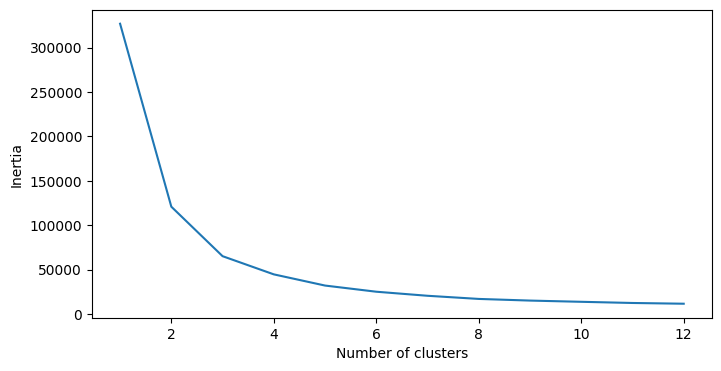

In [70]:
# Plot the elbow method. 
plt.figure(figsize=(8, 4))
plt.plot(cluster_df['Cluster'], cluster_df['sse'])
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [69]:
# Now let's find the correct elbow point 
from kneed import KneeLocator

kl = KneeLocator(range(1, 13), sse, curve='convex', direction='decreasing')
kl.elbow

3

### Hard Clustering vs Soft Clustering
Instead of assigning each instance to a single cluster, which is called hard clustering, it can be useful to give each instance a score per cluster, which is called soft clustering. 